In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import random
import cv2

(3120, 4160)

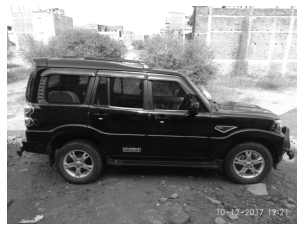

In [36]:
carimage=cv2.imread(r'C:\Users\saurabh\Documents\Desktop\car.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(carimage,cmap='gray')
plt.axis('off')
carimage.shape

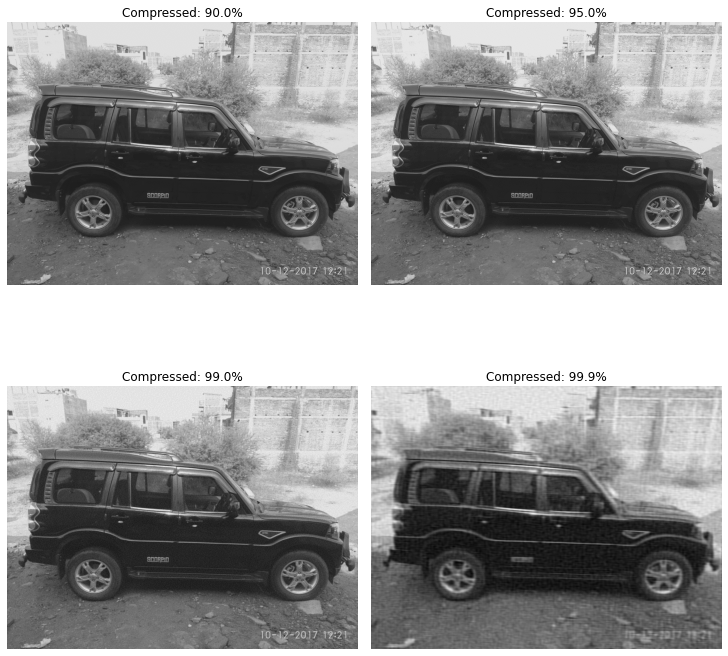

In [45]:
fftcarimage=np.fft.fft2(carimage)
sortfftcarimage=np.sort(np.abs(fftcarimage).reshape(-1))
fig,ax=plt.subplots(2,2,figsize=(10,10),constrained_layout=True)
Quality=[0.1,0.05,0.01,0.001]
index=0
for axes in ax:
    for axis in axes:
        axis.axis('off')
        thresold=sortfftcarimage[int((1-Quality[index])*sortfftcarimage.shape[0])]
        indices=np.abs(fftcarimage)>thresold
        newcarimage=fftcarimage*indices
        newcarimage=np.fft.ifft2(newcarimage).real
        axis.imshow(newcarimage,cmap='gray')
        axis.set_title('Compressed: {}%'.format(100-Quality[index]*100))
        index+=1
        #if index==2:
            #cv2.imwrite(r'C:\Users\saurabh\Documents\Desktop\compressedcar.jpg', newcarimage)

plt.show()

cv2.imwrite(r'C:\Users\saurabh\Documents\Desktop\compressedcar.jpg', newcarimage)

#First Lets Show Different Layers of Image

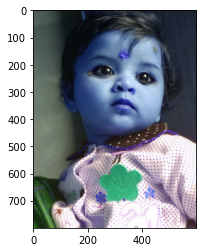

In [2]:
image=cv2.imread(r'C:\Users\saurabh\Documents\Desktop\photo2.jpg')
image=cv2.resize(image,(600,int(image.shape[0]*600/image.shape[1])))
plt.imshow(image,cmap='gray')

In [3]:
image.shape

(800, 600, 3)

In [4]:
Rimagelayer=image[:,:,0].reshape(image.shape[0],image.shape[1])
Gimagelayer=image[:,:,1].reshape(image.shape[0],image.shape[1])
Bimagelayer=image[:,:,2].reshape(image.shape[0],image.shape[1])

In [5]:
Redfft=np.fft.fft2(Rimagelayer)
Greenfft=np.fft.fft2(Gimagelayer)
Bluefft=np.fft.fft2(Bimagelayer)
RedThresold=np.sort(np.abs(Redfft).reshape(-1))[int(0.99*Redfft.shape[0])]
GreenThresold=np.sort(np.abs(Greenfft).reshape(-1))[int(0.99*Greenfft.shape[0])]
BlueThresold=np.sort(np.abs(Bluefft).reshape(-1))[int(0.99*Bluefft.shape[0])]
RGBThresold=min(RedThresold,GreenThresold,BlueThresold)
indices=np.abs(Redfft)>RGBThresold
Redlayer=Redfft*indices
Redlayer=np.fft.ifft2(Redlayer).real

indices=np.abs(Greenfft)>RGBThresold
Greenlayer=Greenfft*indices
Greenlayer=np.fft.ifft2(Greenlayer).real

indices=np.abs(Bluefft)>RGBThresold
Bluelayer=Bluefft*indices
Bluelayer=np.fft.ifft2(Bluelayer).real

Redlayer=Redlayer.reshape(Redlayer.shape[0],Redlayer.shape[1],1)
Greenlayer=Greenlayer.reshape(Greenlayer.shape[0],Greenlayer.shape[1],1)
Bluelayer=Bluelayer.reshape(Bluelayer.shape[0],Bluelayer.shape[1],1)

NewImage=np.append(Redlayer,Greenlayer,axis=2)
NewImage=np.append(NewImage,Greenlayer,axis=2)

NewImage.shape

(800, 600, 3)

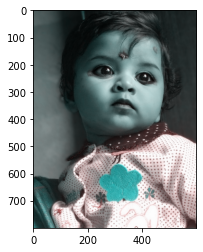

In [6]:
plt.imshow(NewImage.astype('int'),cmap='gray')

cv2.imwrite(r'C:\Users\saurabh\Documents\Desktop\photo10.jpg', NewImage)

cv2.imshow("Red", Rimagelayer)              
cv2.waitKey(0)                                       
cv2.destroyAllWindows()  